Failed
Successful Solution:
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
It takes 2 repetitions to succeed. Runtime in second 0.468718:


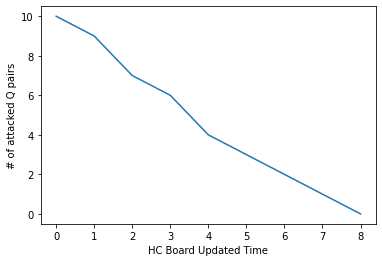

In [89]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 16
TEMPERATURE = 400


def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2


def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board


def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def hill_climbing():
    '''Hill Climbing Search'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)
    
    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens
        
        delta = cost(successor) - cost_answer
        if delta < 0:
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

def simulated_annealing():
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)
    
    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens
        
        delta = cost(successor) - cost_answer
        if delta < 0 or (random.uniform(0, 1) < exp(-delta / t)):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)
    

def print_chess_board(board):
    '''Print the chess board'''
    showBoard = np.zeros([N_QUEENS,N_QUEENS],dtype = int)
    for column, row in board.items():
        showBoard[row][column]=1
        #print("{} => {}".format(column, row))
    for i in range(N_QUEENS):
        print(showBoard[i])

def main(method='HC'):
    start = time.time()
    Success=False
    repetitions=0
    while not Success:
        if method=='SA':
            Success,Costs=simulated_annealing()
            repetitions=repetitions+1
        elif method=='HC':
            Success,Costs=hill_climbing()
            repetitions=repetitions+1
    print("It takes %d repetitions to succeed. Runtime in second %f:"% (repetitions,(time.time() - start)))
    return(Success,Costs)


if __name__ == "__main__":
    method='HC'
    Success,Costs=main(method)  # HC: hill_climbing or SA: Simulated annealing
    plt.plot(Costs)
    plt.xlabel(method+' Board Updated Time')
    plt.ylabel('# of attacked Q pairs')